In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
color = "#2E3037"
background_color = "Dark" # Dark or White

## Loading data

In [2]:
data = pd.read_csv("../dataset/dataset_3.csv", sep = ";").drop("Unnamed: 0", 1)
train, test = train_test_split(data, test_size=0.30)
data.describe()

,SG_UF_RESIDENCIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,TP_LINGUA,NU_IDADE,TP_ANO_CONCLUIU,Escolaridade_Pai,Escolaridade_Mae,Ocupacao_Pai,Renda_Mensal,Empregada_Domestica,Freezer,Computador,Regiao,Renda_per_capta,Celulares_por_pessoa
count,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06,3.174308e+06
mean,1.655957e+01,4.107850e-01,2.139332e+00,4.487454e-01,5.267554e-01,1.995807e+01,2.864464e+00,3.340706e+00,4.067202e+00,2.198937e+00,3.502094e+00,1.423428e-01,4.089887e-01,6.889823e-01,2.212559e+00,8.362171e+02,6.735228e-01
std,7.985093e+00,4.919764e-01,1.012140e+00,6.148052e-01,4.992837e-01,7.184156e+00,3.970037e+00,1.958197e+00,1.738495e+00,1.512535e+00,3.260068e+00,5.667007e-01,6.241007e-01,7.727331e-01,1.509268e+00,1.254462e+03,3.109964e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.994000e+02,5.000000e-01
50%,1.800000e+01,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.000000e+00,3.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.990000e+02,6.666667e-01
75%,2.500000e+01,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.100000e+01,4.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,8.316667e+02,1.000000e+00
max,2.600000e+01,1.000000e+00,5.000000e+00,2.000000e+00,1.000000e+00,8.700000e+01,1.300000e+01,7.000000e+00,7.000000e+00,5.000000e+00,1.600000e+01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+04,4.000000e+00


## Finding the best model

### XGBoost

Precision: 70.46%
Recall: 74.59%


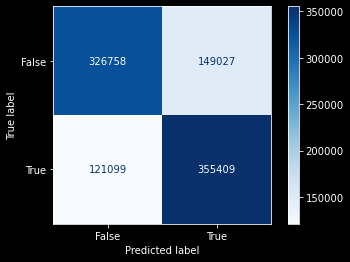

In [3]:
model = xgb.XGBClassifier(n_jobs = -1).fit(train.drop(["DESEMPENHO_BAIXO"], 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))

precision = round(precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")*100, 2)
recall = round(recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary")*100, 2)

print("Precision: " + str(precision) + "%")
print("Recall: " + str(recall) + "%")

if background_color == "White":
    plt.style.use("default")

else:
    plt.style.use('dark_background')

plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = plt.cm.Blues,
                      values_format = "d")

### Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier().fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))

precision = round(precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)
recall = round(recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)

print("Precision: " + str(precision*100) + "%")
print("Recall: " + str(recall*100) + "%")

if background_color == "White":
    plt.style.use("default")

else:
    plt.style.use('dark_background')

plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = plt.cm.Blues, 
                      values_format = "d")

### Finding the best parameters

In [ ]:
grid = {'max_depth':          [8, 12, 15, 20],
        'min_samples_split':  [100, 200, 500, 1000, 2000, 3500, 5000, 10000],
        'min_samples_leaf':   [20, 40, 60, 80, 150, 300, 500, 1000, 2000],
        'ccp_alpha':          [0.000005, 0.000001, 0.000005, 0.000001, 0.0000005, 0.0000001, 0],
        'min_impurity_decrease': [0.000005, 0.000001, 0.000005, 0.000001, 0.0000005, 0.0000001, 0]
        }

rf = DecisionTreeClassifier()
rf_random = GridSearchCV(estimator = rf, param_grid = grid, cv = 3, n_jobs = -1)
rf_random.fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
rf_random.best_params_

In [ ]:
model = DecisionTreeClassifier(max_depth = , min_samples_split = , min_samples_split = , 
                               min_samples_leaf = 40, ccp_alpha = , 
                               min_impurity_decrease = ).fit(train.drop("DESEMPENHO_BAIXO", 1), train["DESEMPENHO_BAIXO"])
predictions = model.predict(test.drop(["DESEMPENHO_BAIXO"], 1))

precision = round(precision_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)
recall = round(recall_score(test["DESEMPENHO_BAIXO"] , predictions, average = "binary"), 4)

print("Precision: " + str(precision*100) + "%")
print("Recall: " + str(recall*100) + "%")

if background_color == "White":
    plt.style.use("default")

else:
    plt.style.use('dark_background')

plot_confusion_matrix(model, test.drop(["DESEMPENHO_BAIXO"], 1), test["DESEMPENHO_BAIXO"], cmap = plt.cm.Blues, 
                      values_format = "d")

### Plotting tree

In [ ]:
if background_color == "White":
    plt.style.use("default")
    plt.figure(figsize=(35, 15))

else:
    plt.style.use('dark_background')
    plt.figure(figsize=(35, 15), facecolor=color)
    ax = plt.gca()
    ax.set_facecolor(color)

plt.figure(figsize=(100,50))
tree.plot_tree(model, feature_names=data.columns, class_names= ["Abaixo_da_Media", "Acima_da_Media"],
                filled=True, max_depth=4, fontsize=16)

### Storing the predictions for entire dataset

In [4]:
predictions = model.predict(data.drop(["DESEMPENHO_BAIXO"], 1))
data["Previsao"] = predictions

def mapea_acertou(data):
    if data["Previsao"] == 0 and data["DESEMPENHO_BAIXO"] == 0: return 1
    if data["Previsao"] == 1 and data["DESEMPENHO_BAIXO"] == 1: return 1
    else: return 0

data["Acertou"] = data.apply(mapea_acertou, 1)

## Saving data

In [5]:
data.to_csv("../dataset/dataset_4.csv", sep = ";")